In [1]:
import sys
import pandas as pd
import numpy as np

# Add the src directory to the Python path
sys.path.append('../src')

from visualizations import DataVisualizer

## Dataset Overview and Initial Observations

In [2]:
# Load the raw_data
raw_data = pd.read_csv('../data/raw/data.csv')


In [8]:

# Understand the structure of the dataset
print("Shape of the dataset:", raw_data.shape)
print("\nColumns and Data Types:")
print(raw_data.dtypes)

# Preview the dataset
print("\nSample Rows:")
raw_data.head()

Shape of the dataset: (95662, 16)

Columns and Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Sample Rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



### Shape of the Dataset
- The dataset contains **95,662 rows** and **16 columns**, indicating a substantial volume of transactional data that can be used for analysis.

### Columns and Data Types
- The dataset includes a mix of data types:
  - **Object**: Used for categorical or string data such as IDs (e.g., `TransactionId`, `AccountId`, `ProductCategory`).
  - **Numerical**: Includes both integer (`int64`) and float (`float64`) data types for columns like `Amount`, `Value`, and `PricingStrategy`.
  - **Datetime Representation**: `TransactionStartTime` is stored as an object and might need conversion to a proper datetime format for time-based analysis.

### Key Observations
1. **Categorical Data**:
   - Many columns, such as `ProductId`, `ChannelId`, and `CurrencyCode`, are likely categorical and may require encoding for machine learning tasks.
   
2. **Numerical Features**:
   - Columns like `Amount`, `Value`, and `PricingStrategy` are numeric, which could be directly used in statistical and ML models.

3. **Fraud Detection Potential**:
   - The `FraudResult` column appears to be the target variable, suggesting the dataset might be used for fraud detection.

4. **Data Cleaning Requirements**:
   - The `TransactionStartTime` column is in object format, and it may need conversion to a datetime format for analysis of time trends.
   - Check for missing values, duplicates, and potential outliers in numeric columns like `Amount`.

### Next Steps
- Perform exploratory data analysis (EDA) to:
  - Summarize key statistics and detect any anomalies.
  - Understand correlations between features and the target variable (`FraudResult`).
  - Identify and handle missing or inconsistent data.
- Consider feature engineering:
  - Convert categorical columns to numerical representations.
  - Extract date-related features (e.g., month, day, hour) from `TransactionStartTime`.



In [4]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(raw_data.describe())

# Check for unique values in categorical columns
categorical_cols = raw_data.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {raw_data[col].nunique()} unique values")



Summary Statistics for Numerical Columns:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Unique values in categorical columns:
TransactionId: 95662 unique values
BatchId: 94809 unique values
AccountId: 3633 unique values
SubscriptionId: 3627 unique values
CustomerId: 3742 unique values
CurrencyCode: 1 unique values
ProviderId: 6 unique value

**Key Observations**:
- `Amount` has high variability and includes negative values, likely refunds or errors.
- Fraud is rare (0.2% of cases), suggesting imbalanced data.

### Categorical Columns
- High cardinality: `TransactionId`, `BatchId`, `TransactionStartTime`.
- Low cardinality: `ProviderId` (6), `ProductCategory` (9), `ChannelId` (4).
- Single currency (`CurrencyCode`).

**Key Observations**:
- `TransactionId` and `BatchId` are unique per transaction or batch.
- Limited providers and channels simplify categorical analysis.


In [3]:
# Initialize the visualizer
visualizer = DataVisualizer(raw_data)


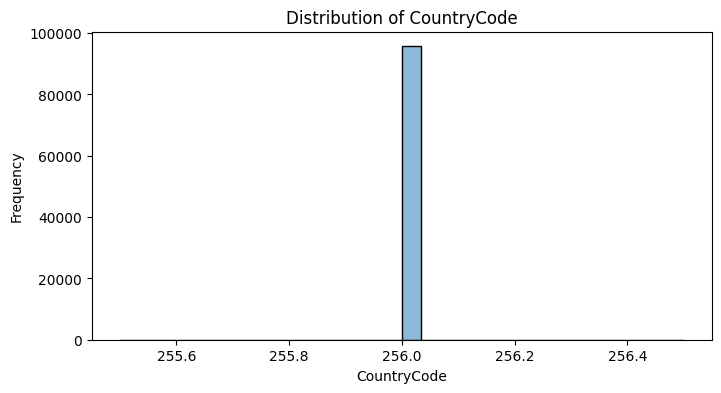

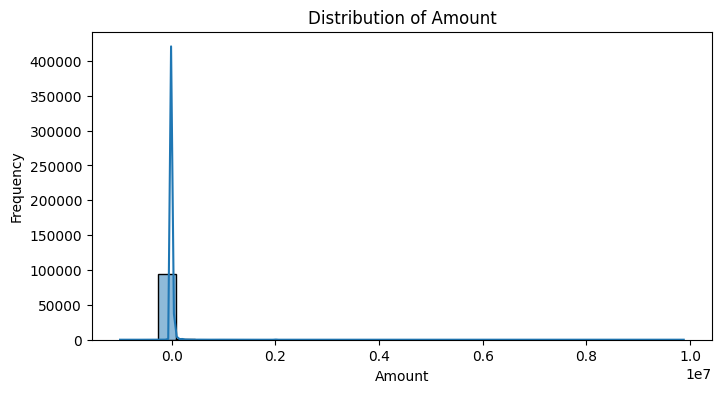

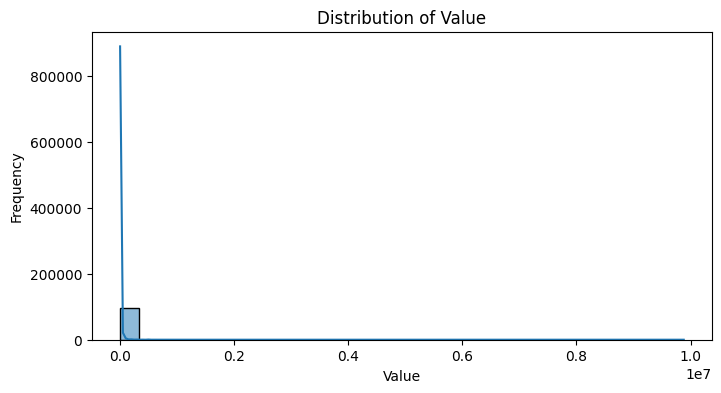

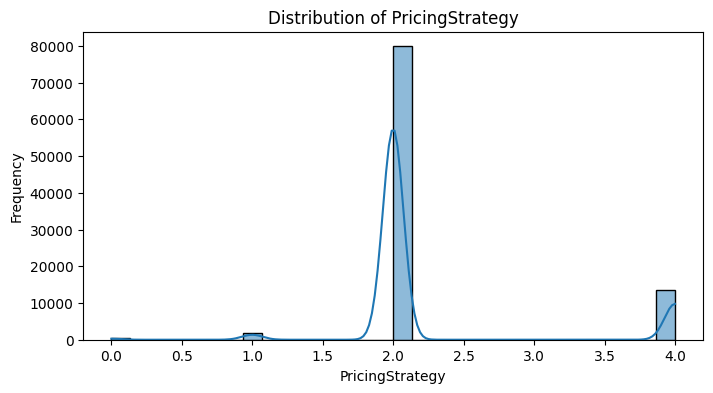

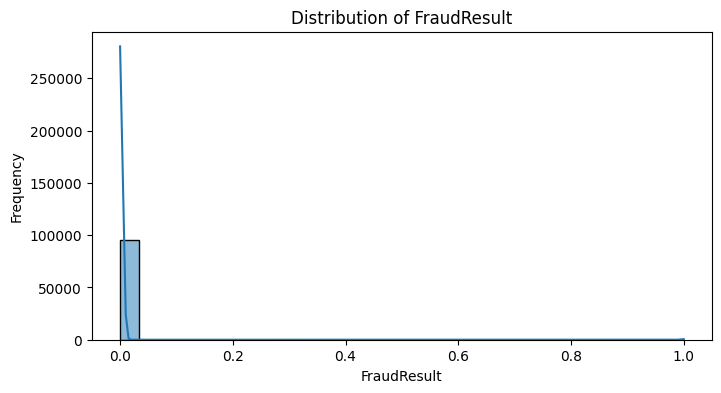

In [10]:

# Visualize numerical distributions
visualizer.plot_numerical_distribution()


## Data Distributions Analysis

1. **Distribution of CountryCode**
   - The `CountryCode` around the value `256.0` has an extremely high frequency, nearing 100,000 occurrences. This indicates that this specific code is significantly more common compared to other country codes in the range.

2. **Distribution of Amount**
   - Most of the data points are concentrated at lower amounts. The frequency sharply peaks at low amounts and quickly drops off, indicating that extremely high amounts are rare.

3. **Distribution of Value**
   - The distribution is right-skewed. Most values are small and clustered towards the lower end, with frequencies dropping significantly for larger values. This suggests that high values are uncommon in the dataset.

4. **Distribution of PricingStrategy**
   - Similar to the previous graphs, values are grouped at the lower end of the range, with frequencies decreasing quickly as values increase. Higher pricing strategies are not as prevalent.

5. **Distribution of FraudResult**
   - The majority of data points have a FraudResult of `0`, indicating non-fraudulent transactions. Instances of fraud (greater than `0`) are rare within the dataset.


In [ ]:

# Visualize categorical distributions
visualizer.plot_categorical_distribution()


In [ ]:

# Visualize correlation matrix
visualizer.plot_correlation_matrix()


In [ ]:

# Visualize outliers
visualizer.plot_outliers()